In [2]:
import numpy as np
import copy
import matplotlib.pyplot as plt 


In [3]:
class Forel:
    def __init__(self,X,R):
        self.points=np.copy(X)
        self.uncolored_points=list(range(len(self.points)))
        self.R=R
        self.centers=[]
        self.clusters=[]
    
    def _get_distance(self,point_1,point_2):
        return np.linalg.norm(point_2-point_1)

    def _get_points_for_cluster(self,cur_point):
        return [point_n for point_n in self.uncolored_points if self._get_distance(cur_point,self.points[point_n])<=self.R]
    
    def _exclude_colored_points(self,cluster):
        for item in cluster:
            i=self.uncolored_points.index(item)
            del(self.uncolored_points[i])
    
    def _reset_uncolored_points(self,old_cluster,new_cluster):
        points_for_reset=np.delete(old_cluster,new_cluster)
        self.uncolored_points+=points_for_reset

    def _get_mean(self,cluster):
        return np.mean(self.points[cluster],axis=0)

    def get_new_centoid(self,cur_x,cluster):
        old_x=cur_x
        cur_x=self._get_mean(cluster)
        new_cluster=self._get_points_for_cluster(cur_x)
        #self._reset_uncolored_points(cluster,new_cluster)
        return cur_x, new_cluster
    
    def vizualize(self):
        plt.title('Представление точек')
        colors=['r','b','y','m','c','k']
        for n_cluster,cluster in enumerate(self.clusters):
            points=self.points[cluster]
            x_1 = []
            y_1 = []
            for el in points:
                x_1.append(el[0])
                y_1.append(el[1])
            plt.scatter(x_1,y_1,marker='o',c=colors[n_cluster%len(colors)],edgecolor='b')

        x_1 = []
        y_1 = []
        for n_cluster,el in enumerate(self.centers):
            plt.scatter(el[0],el[1],marker='+',c=colors[n_cluster%len(colors)],edgecolor='r')
        plt.grid()
        plt.show()

        

    def fit(self):
        while self.uncolored_points:
            old_x=self.points[self.uncolored_points[np.random.choice(len(self.uncolored_points))]]
            cluster=self._get_points_for_cluster(old_x)
            cur_x,cluster=self.get_new_centoid(old_x,cluster)
            while not np.array_equal(cur_x,old_x):
                old_x=cur_x
                cur_x,cluster=self.get_new_centoid(old_x,cluster)
            self._exclude_colored_points(cluster)
            self.centers.append(cur_x)
            self.clusters.append(cluster)
        

                




C:\Users\servo\AppData\Local\Temp/ipykernel_10948/3220511198.py:49: UserWarning: You passed a edgecolor/edgecolors ('r') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(el[0],el[1],marker='+',c=colors[n_cluster%len(colors)],edgecolor='r')


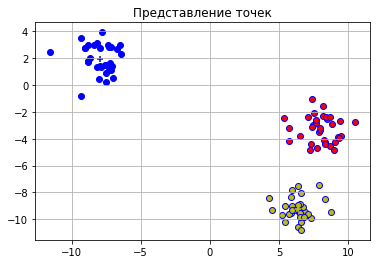

In [6]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=100, centers=3, n_features=2,random_state=6)
R=4
model=Forel(X,R)
model.fit()
model.vizualize()
